Comic book character genders over the years.

In [10]:
    import pandas    
    %matplotlib inline
    universes = "dc marvel"

In [5]:
    df = pandas.concat([
        pandas.read_csv(
            F"https://github.com/fivethirtyeight/data/raw/master/comic-characters/{object}-wikia-data.csv")
        for object in universes.split()
    ], sort=True).pipe(lambda df:df[~df.isna()])
    df.sample()

In [19]:
    df.SEX.value_counts().to_frame().T

,Male Characters,Female Characters,Agender Characters,Genderless Characters,Genderfluid Characters,Transgender Characters
SEX,16421,5804,45,20,2,1


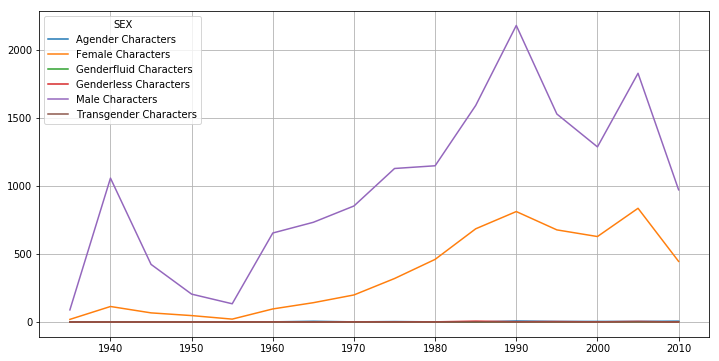

In [21]:
    genders = df.SEX.groupby([
        df.SEX, df[['YEAR', 'Year']].max(axis=1)
    ]).count().unstack(0).fillna(0).pipe(
        lambda df: df.groupby(5*(df.index//5))
    ).sum()
    genders.plot(grid=True, figsize=(12, 6));